# 03. Pytorch Computer Vision

![Pytorch Computer Vision Workflow](../assets/03-pytorch-computer-vision-workflow.png)

## 0. Computer Vision Libraries in Pytorch

| **PyTorch module** | **What does it do?** |
| --- | --- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. |
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. |
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch. |
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import  matplotlib.pyplot as plt

print(f"Pytorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

Pytorch version: 2.8.0
torchvision version: 0.23.0


## 1. Getting a Dataset

![Fashion MNIST Dataset](../assets/03-fashion-mnist-slide.png)

- `torchvision.datasets` contains a lot of example datasets you can use to practice writing computer vision code on. FashionMNIST is one of those datasets. And since it has 10 different image classes (different types of clothing), it's a multi-class classification problem.

- PyTorch has a bunch of computer vision datasets stored in torchvision.datasets. Including FashionMNIST in `torchvision.datasets.FashionMNIST()`


To download it, we provide the following parameters:

- root: str - which folder do you want to download the data to?

- train: Bool - do you want the training or test split?

- download: Bool - should the data be downloaded?

- transform: torchvision.transforms - what transformations would you like to do on the data?

- target_transform - you can transform the targets (labels) if you like too.


In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root = 'data',
    train = True,   # get training data
    download = True,    
    transform = ToTensor(),     # Images come as a PIL format, we want to turn into Torch tensors
    target_transform = None,
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor()
)

In [3]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

### 1.1 Input and Output shape of a Computer Vision model

- We've got a big tensor of values (the image) leading to a single value for the target (the label).


In [4]:
# What's the shape of the image ?
image.shape

torch.Size([1, 28, 28])

`[color_channels=1, height=28, width=28]`

- `color_channels = 1` means the image is greyscale.

![Input and Output Shapes](../assets/03-computer-vision-input-and-output-shapes.png)

- Various problems will have various input and output shapes. But the premise remains: encode data into numbers, build a model to find patterns in those numbers, convert those patterns into something meaningful.

- If color_channels=3, the image comes in pixel values for red, green and blue (this is also known as the RGB color model).

- The order of our current tensor is often referred to as `CHW` (Color Channels, Height, Width).

In [5]:
# let's check how many samples are there
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [6]:
# see classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### 1.2 Visualizing our Data



Image Shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

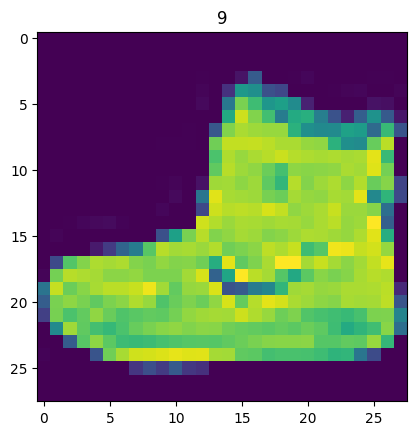

In [7]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image Shape: {image.shape}")
plt.imshow(image.squeeze())     # image shape is [1,28,28]  (color_channels, height, width)
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

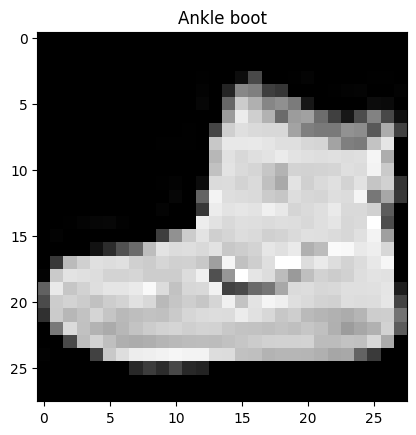

In [8]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])

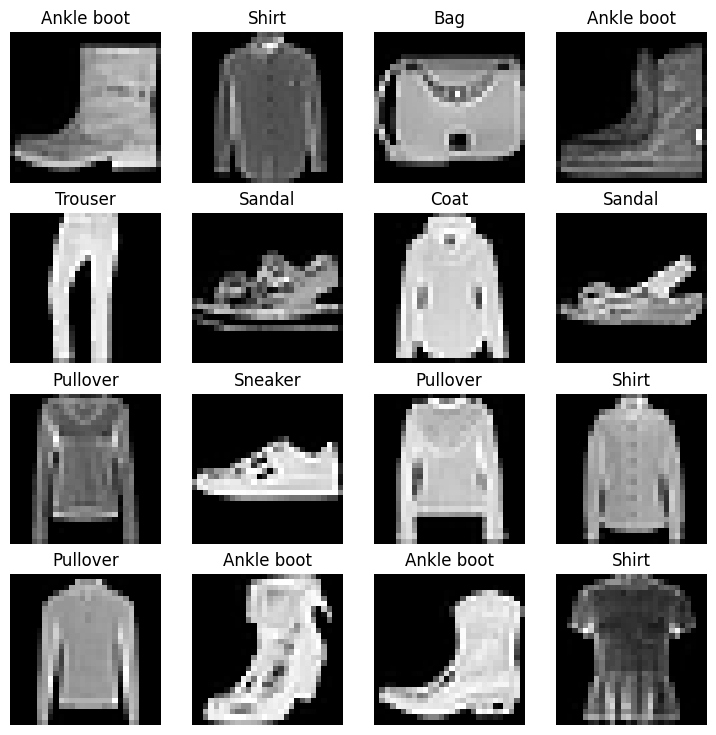

In [10]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

## 2. Prepare DataLoader

DataLoader - It helps load data into a model. For training and for inference. It turns a large Dataset into Python iterable of smaller chunks. These smaller chunks are called batches or mini-batches and can be set by the batch_size parameter.

It's more computationally efficient.

- With mini-batches (small portions of the data), gradient descent is performed more often per epoch (once per mini-batch rather than once per epoch).

- Good Batch Size: 32 is a good place to start. But since this is a value you can set (a hyperparameter) you can try all different kinds of values, though generally powers of 2 are used most often (e.g. 32, 64, 128, 256, 512).

Let's create a DataLoader for our training and test sets.

In [11]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

# Let's check out what we've created
print(f"Dataloader: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloader: (<torch.utils.data.dataloader.DataLoader object at 0x33afb2290>, <torch.utils.data.dataloader.DataLoader object at 0x33afb37f0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [12]:
# Check out what's insise the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


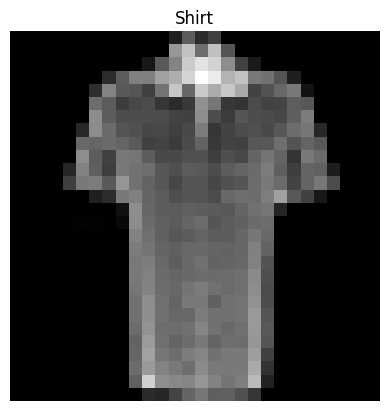

In [13]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis('Off')
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

Time to build a baseline model by subclassing nn.Module.

A baseline model is one of the simplest models you can imagine.

You use the baseline as a starting point and try to improve upon it with subsequent, more complicated models.

Because we're working with image data, we're going to use a different layer to start things off.

And that's the nn.Flatten() layer.

nn.Flatten() compresses the dimensions of a tensor into a single vector.



In [14]:
# Create a flatten layer
flatten_model = nn.Flatten()    # all nn modules functions as a model (can do a forward pass)
# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)   # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [c, h, w]")
print(f"Shape after flattening: {output.shape} -> [c, h*w]")


Shape before flattening: torch.Size([1, 28, 28]) -> [c, h, w]
Shape after flattening: torch.Size([1, 784]) -> [c, h*w]


The nn.Flatten() layer took our shape from [color_channels, height, width] to [color_channels, height*width].

Why do this?

Because we've now turned our pixel data from height and width dimensions into one long feature vector.

And nn.Linear() layers like their inputs to be in the form of feature vectors.

In [15]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape:int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape, out_features = hidden_units),
            nn.Linear(in_features = hidden_units, out_features = output_shape)            
        )
    def forward(self, x):
        return self.layer_stack(x)
    

In [16]:
torch.manual_seed(42)

# Need to setup model with input paramters
model_0 = FashionMNISTModelV0(input_shape = 784, hidden_units = 10, output_shape = len(class_names))

model_0.to('cpu')

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### 3.1 Setup Loss, Optimizer and evaluation metrics



In [17]:
# defining the accuracy function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = correct / len(y_pred) * 100
    return acc

In [18]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()     # this is also called criterion or cost function
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

### 3.2 Crearting a function to time our experiments

let's make a timing function to measure the time it takes our model to train on CPU versus using a GPU.

We'll train this model on the CPU but the next one on the GPU and see what happens.

Our timing function will import the timeit.default_timer() function from the Python timeit module.



In [19]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
    """ Prints difference between start and end time
    Args:
        start (float): start time of computation (preferred in timeit format)
        end (float) : End time of computation
        device ([type], optional) : Device that compute is running on. Defaults to None.
    
    Returns:
        float: time between start and end in seconds (higher is longer)
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time


### 3.3 Creating a training loop and training a model on a batches of data

- we will add another loop to loop through our data batches

- Our databatches are contained within our Dataloader's train_dataloader, test_dataloader for the training and test data splits respectively.

- Since we are computing on batches of data, out loss functions and evaluation metrics will be calculated per batch rather than accross the whole dataset.

- this means, we'll have to divide our loss and accuracy values by the number of batches in each dataset's respective dataloader.

- Let's step through it : 
    1. Loop through epochs
    2. Loop through training batches. perform training steps, calculate the train loss per batch
    3. Loop through testing batches, perform testing steps, calculate the test loss per batch
    4. Print out what's happening
    5. time it all (for fun)

    

In [22]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3
# device = 'mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu'

# creating training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----------")
    ### training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)
        
        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
            
    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0,0
    model_0.eval()
    with torch.inference_mode():
        for X,y in test_dataloader:
            # Forward pass
            test_pred = model_0(X)
            
            # Calculate the loss (accumulatively)
            test_loss += loss_fn(test_pred, y)      # accumulatively add up the loss per epoch 
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
            
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)
        
        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)
        
    # Print out what's happending
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
    

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(
    start = train_time_start_on_cpu,
    end = train_time_end_on_cpu,
    device = str(next(model_0.parameters()).device)
)
            

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.42655 | Test loss: 0.45735, Test acc: 84.02%

Epoch: 1
-----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.42340 | Test loss: 0.45961, Test acc: 84.20%

Epoch: 2
-----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.41963 | Test loss: 0.46264, Test acc: 83.99%

Train time on cpu: 5.473 seconds


## 4. Make predictions and get Model 0 results

- Namely, let's create a function that takes in a trained model, a DataLoader, a loss function and an accuracy function.

- The function will use the model to make predictions on the data in the DataLoader and then we can evaluate those predictions using the loss function and accuracy function.



In [24]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn):
    """ Returns a dictionary containing the results of model predicting on data_loader
    Args:
        - model (torch.nn.Module): A pytorch model capable of making predictions on data_lodaer
        - data_loader (torch.utils.data.DataLoader) : The target dataset to predict on
        - loss_fn (torch.nn.Module) : The loss function of model
        - accuracy_fn : An accuracy function to compare the models predictions to the truth labels
    Returns:
        (dict): Results of model making predictions on data_loader
    """
    loss, acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            # make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))
            
        # Scale loss and accuracy to find the average loss/acc per 
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {
        "model_name": model.__class__.__name__,
        'model_loss': loss.item(),
        'model_acc': acc,
    }
    
# Calculate model 0 results on test dataset
model_0_results = eval_model(model = model_0, data_loader = test_dataloader, loss_fn = loss_fn, accuracy_fn = accuracy_fn)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.46264058351516724,
 'model_acc': 83.98562300319489}

### 5. Setup device agnostic code


In [26]:
import torch

device = 'mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu'

device

'mps'

## 6. Model-1: Building a better model with non-linearity



In [29]:
# create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU(),
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)
    
    
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 784, hidden_units = 10, output_shape = len(class_names)).to(device)

print(next(model_1.parameters()).device)
print(model_1)


mps:0
FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)


### 6.1 Setup Loss, Optimizer and evaluation metrics




In [30]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr=0.1)

### 6.2 Functionizing Training and Test Loops
